<a href="https://colab.research.google.com/github/DIExCRY-EDU/test/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Лабораторная работа #1</h1>
<h2>Импорт библиотек</h2>

In [225]:
import numpy as np
import pandas as pd
import sklearn as sk
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt

<h2>Загрузка датасета</h2>

In [167]:
INDEX_COL = 0
answer = files.upload()

Saving answer.csv to answer (12).csv


In [187]:
dirt_dataset = pd.read_csv('answer (8).csv')
dirt_dataset.head()

,Unnamed:0,Отметка времени,UserId,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,1,15.03.2021 22:42:15,Георгий,7,8,10,8,8,7,5,10,8,10
1,2,15.03.2021 22:42:44,Юля,7,8,6,8,7,8,4,3,6,7
2,3,15.03.2021 22:43:39,Полина Кузнецова,5,4,6,8,2,6,6,8,9,10
3,4,18.03.2021 2:38:18,1k pts フtiltedフ,3,3,6,7,2,8,3,1,3,9
4,5,18.03.2021 12:08:18,Таня В,2,2,10,8,5,9,3,1,5,10


In [188]:
dirt_dataset = pd.read_csv('answer (8).csv', index_col=INDEX_COL)
dirt_dataset.head()

,Отметка времени,UserId,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
Unnamed:0,,,,,,,,,,,,
1,15.03.2021 22:42:15,Георгий,7,8,10,8,8,7,5,10,8,10
2,15.03.2021 22:42:44,Юля,7,8,6,8,7,8,4,3,6,7
3,15.03.2021 22:43:39,Полина Кузнецова,5,4,6,8,2,6,6,8,9,10
4,18.03.2021 2:38:18,1k pts フtiltedフ,3,3,6,7,2,8,3,1,3,9
5,18.03.2021 12:08:18,Таня В,2,2,10,8,5,9,3,1,5,10


<h2>Убираем ненужную колонку времени</h2>

In [189]:
del dirt_dataset['Отметка времени']
del dirt_dataset['UserId']
dirt_dataset.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
Unnamed:0,,,,,,,,,,
1,7,8,10,8,8,7,5,10,8,10
2,7,8,6,8,7,8,4,3,6,7
3,5,4,6,8,2,6,6,8,9,10
4,3,3,6,7,2,8,3,1,3,9
5,2,2,10,8,5,9,3,1,5,10


In [190]:
dirt_dataset.shape

(207, 10)

<h2>Первичный зрительный анализ</h2>

In [191]:
dirt_dataset.describe()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,6.038647,5.990338,6.565217,6.772947,5.942029,6.603865,6.265700,5.169082,6.777778,7.280193
std,2.213913,1.933331,1.868063,1.951261,2.318462,1.848007,2.181549,2.446597,1.737337,2.205189
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.500000,6.000000,4.000000,6.000000,5.000000,3.000000,6.000000,6.000000
50%,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,5.000000,7.000000,7.000000
75%,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [192]:
dirt_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 1 to 207
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   q1      207 non-null    int64
 1   q2      207 non-null    int64
 2   q3      207 non-null    int64
 3   q4      207 non-null    int64
 4   q5      207 non-null    int64
 5   q6      207 non-null    int64
 6   q7      207 non-null    int64
 7   q8      207 non-null    int64
 8   q9      207 non-null    int64
 9   q10     207 non-null    int64
dtypes: int64(10)
memory usage: 17.8 KB


<h2>Проверка на Nan</h2>

In [193]:
dirt_dataset.isnull().sum()

q1     0
q2     0
q3     0
q4     0
q5     0
q6     0
q7     0
q8     0
q9     0
q10    0
dtype: int64

<h2>Линейная нормализация</h2>

In [194]:
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(dirt_dataset[['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']])

In [195]:
norm_df = pd.DataFrame(norm_data, columns=dirt_dataset.columns, index=dirt_dataset.index)
norm_df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
Unnamed:0,,,,,,,,,,
1,0.666667,0.777778,1.000000,0.777778,0.777778,0.666667,0.444444,1.000000,0.777778,1.000000
2,0.666667,0.777778,0.555556,0.777778,0.666667,0.777778,0.333333,0.222222,0.555556,0.666667
3,0.444444,0.333333,0.555556,0.777778,0.111111,0.555556,0.555556,0.777778,0.888889,1.000000
4,0.222222,0.222222,0.555556,0.666667,0.111111,0.777778,0.222222,0.000000,0.222222,0.888889
5,0.111111,0.111111,1.000000,0.777778,0.444444,0.888889,0.222222,0.000000,0.444444,1.000000


In [196]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 1 to 207
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q1      207 non-null    float64
 1   q2      207 non-null    float64
 2   q3      207 non-null    float64
 3   q4      207 non-null    float64
 4   q5      207 non-null    float64
 5   q6      207 non-null    float64
 6   q7      207 non-null    float64
 7   q8      207 non-null    float64
 8   q9      207 non-null    float64
 9   q10     207 non-null    float64
dtypes: float64(10)
memory usage: 17.8 KB


<h2>Избавляемся от дубликатов</h2>

In [197]:
new_norm_df = norm_df.drop_duplicates()
new_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 1 to 207
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q1      206 non-null    float64
 1   q2      206 non-null    float64
 2   q3      206 non-null    float64
 3   q4      206 non-null    float64
 4   q5      206 non-null    float64
 5   q6      206 non-null    float64
 6   q7      206 non-null    float64
 7   q8      206 non-null    float64
 8   q9      206 non-null    float64
 9   q10     206 non-null    float64
dtypes: float64(10)
memory usage: 17.7 KB


<h2>Добавляем информативные признаки</h2>

In [198]:
def add_conj(f1, f2, f3):
  new_norm_df['k11'] = (new_norm_df[f1].astype(float) + new_norm_df[f2].astype(float) + new_norm_df[f3].astype(float)) / 3
  return new_norm_df.head()


In [199]:
add_conj('q3', 'q2', 'q8')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,k11
Unnamed:0,,,,,,,,,,,
1,0.666667,0.777778,1.000000,0.777778,0.777778,0.666667,0.444444,1.000000,0.777778,1.000000,0.925926
2,0.666667,0.777778,0.555556,0.777778,0.666667,0.777778,0.333333,0.222222,0.555556,0.666667,0.518519
3,0.444444,0.333333,0.555556,0.777778,0.111111,0.555556,0.555556,0.777778,0.888889,1.000000,0.555556
4,0.222222,0.222222,0.555556,0.666667,0.111111,0.777778,0.222222,0.000000,0.222222,0.888889,0.259259
5,0.111111,0.111111,1.000000,0.777778,0.444444,0.888889,0.222222,0.000000,0.444444,1.000000,0.370370


In [200]:
def add_conj_2(f1, f2, f3):
  new_norm_df['k12'] = (new_norm_df[f1].astype(float) + new_norm_df[f2].astype(float) + new_norm_df[f3].astype(float)) / 3
  return new_norm_df.head()

In [201]:
add_conj_2('q1', 'q5', 'q10')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,k11,k12
Unnamed:0,,,,,,,,,,,,
1,0.666667,0.777778,1.000000,0.777778,0.777778,0.666667,0.444444,1.000000,0.777778,1.000000,0.925926,0.814815
2,0.666667,0.777778,0.555556,0.777778,0.666667,0.777778,0.333333,0.222222,0.555556,0.666667,0.518519,0.666667
3,0.444444,0.333333,0.555556,0.777778,0.111111,0.555556,0.555556,0.777778,0.888889,1.000000,0.555556,0.518519
4,0.222222,0.222222,0.555556,0.666667,0.111111,0.777778,0.222222,0.000000,0.222222,0.888889,0.259259,0.407407
5,0.111111,0.111111,1.000000,0.777778,0.444444,0.888889,0.222222,0.000000,0.444444,1.000000,0.370370,0.518519


In [204]:
a = new_norm_df.values
new_norm_df['y(x)'] = np.mean(a, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method NDFrame.head of                  q1        q2        q3  ...       k11       k12      y(x)
Unnamed:0                                ...                              
1          0.666667  0.777778  1.000000  ...  0.925926  0.814815  0.802469
2          0.666667  0.777778  0.555556  ...  0.518519  0.666667  0.598765
3          0.444444  0.333333  0.555556  ...  0.555556  0.518519  0.589506
4          0.222222  0.222222  0.555556  ...  0.259259  0.407407  0.379630
5          0.111111  0.111111  1.000000  ...  0.370370  0.518519  0.490741
...             ...       ...       ...  ...       ...       ...       ...
203        0.888889  0.666667  0.777778  ...  0.740741  0.888889  0.746914
204        0.222222  0.222222  1.000000  ...  0.740741  0.444444  0.580247
205        0.777778  0.666667  0.888889  ...  0.740741  0.851852  0.725309
206        0.666667  0.444444  0.666667  ...  0.481481  0.666667  0.549383
207        0.555556  0.777778  0.666667  ...  0.703704  0.592593  0.61

In [207]:
new_norm_df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,k11,k12,y(x)
Unnamed:0,,,,,,,,,,,,,
1,0.666667,0.777778,1.000000,0.777778,0.777778,0.666667,0.444444,1.000000,0.777778,1.000000,0.925926,0.814815,0.802469
2,0.666667,0.777778,0.555556,0.777778,0.666667,0.777778,0.333333,0.222222,0.555556,0.666667,0.518519,0.666667,0.598765
3,0.444444,0.333333,0.555556,0.777778,0.111111,0.555556,0.555556,0.777778,0.888889,1.000000,0.555556,0.518519,0.589506
4,0.222222,0.222222,0.555556,0.666667,0.111111,0.777778,0.222222,0.000000,0.222222,0.888889,0.259259,0.407407,0.379630
5,0.111111,0.111111,1.000000,0.777778,0.444444,0.888889,0.222222,0.000000,0.444444,1.000000,0.370370,0.518519,0.490741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.888889,0.666667,0.777778,0.777778,0.777778,0.222222,0.666667,0.777778,0.777778,1.000000,0.740741,0.888889,0.746914
204,0.222222,0.222222,1.000000,0.444444,0.111111,0.111111,0.666667,1.000000,1.000000,1.000000,0.740741,0.444444,0.580247
205,0.777778,0.666667,0.888889,0.777778,0.777778,0.222222,0.666667,0.666667,0.666667,1.000000,0.740741,0.851852,0.725309


In [208]:
label = new_norm_df['y(x)'].astype('float64')
label

Unnamed:0
1      0.802469
2      0.598765
3      0.589506
4      0.379630
5      0.490741
         ...   
203    0.746914
204    0.580247
205    0.725309
206    0.549383
207    0.617284
Name: y(x), Length: 206, dtype: float64

<h2>Применяем ExtraTreeClassifier (оптимальный набор признаков)</h2>

In [209]:
clf = ExtraTreesClassifier()
array = new_norm_df.values
X = array[:,0:13]
Y = array[:,12]
X_scale = sk.preprocessing.scale(X)
y_scale = sk.preprocessing.scale(Y)

In [210]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_scale)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_scale))
print(utils.multiclass.type_of_target(y_scale.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[140  77  75   7  32  39   3  26 136 115  39 111 113  45  23  63  64 100
  30  86  66 121 118   1   9  20 147 107  55  55  64 146  62  98 117  56
 127  93  99  58  85 143  92 125  17 119  76  81  86  40  84  75  18  19
 134  34   8 114 133  49  70  87   4  24  43  91  86  64  70  97  82  54
 141 135   6  26  47  95 108 148  73 110 122  97  98 106  54 128  82  89
  33  48 132 142  66 126 116 107  86  61  74  12 124  30  53  94 104  33
  65 144  11  31  80 137 122  35 130 128  33  37   5 101  52  72  81 120
 112  71  61  89  84  50  42  96  67  90  14 131 103  13  10  16   2  46
  33  87  41  21 105  15 109 102  79 138  79  33  29  27  86 117  78  59
 139  38 100  71  22  28  57  75  22   0  60  61  25  88  88  36 124  44
  78  51  32  62  68  94  39  82  51  52  60  61  57  83  62  30  71 105
  92  45 145 129  69 123  52  86]
continuous
multiclass
multiclass


In [211]:
clf = ExtraTreesClassifier()
fited = clf.fit(X_scale, training_scores_encoded)
print("ExtraTreesClassifier")
print(fited)
print(clf.feature_importances_)

ExtraTreesClassifier
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
[0.06678291 0.07013358 0.07377684 0.07081899 0.07057459 0.0698522
 0.07398316 0.07021216 0.07764854 0.07427138 0.07601583 0.08022122
 0.1257086 ]


In [215]:
imp_fea = clf.feature_importances_
imp_fea

array([0.06678291, 0.07013358, 0.07377684, 0.07081899, 0.07057459,
       0.0698522 , 0.07398316, 0.07021216, 0.07764854, 0.07427138,
       0.07601583, 0.08022122, 0.1257086 ])

<p>На основе полученных коэффициентов можем выделить признаки:</p>
<h4>q9, k12, y(x)</h4>

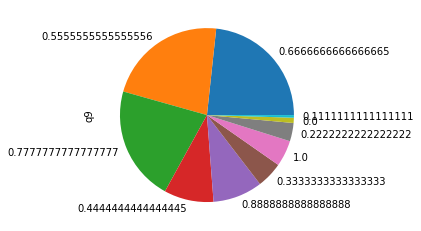

In [228]:
new_norm_df['q9'].value_counts().plot.pie()

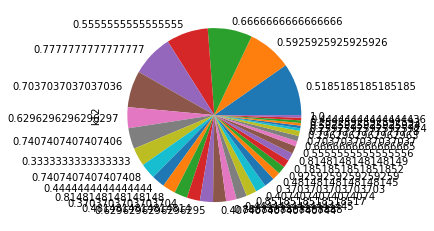

In [220]:
new_norm_df['k12'].value_counts().plot.pie()

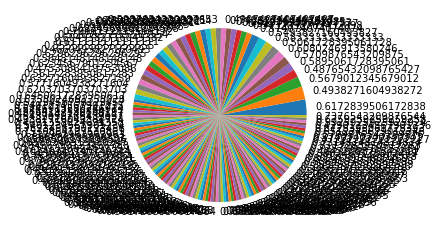

In [221]:
new_norm_df['y(x)'].value_counts().plot.pie()

In [232]:
def add_conj_3(f1, f2, f3):
  if (new_norm_df[f1].astype(float) + new_norm_df[f2].astype(float) + new_norm_df[f3].astype(float)) / 3 > 0.5:
    new_norm_df['POT'] = 1
  else:
    new_norm_df['POT'] = 0
  return new_norm_df.head()

In [233]:
add_conj_3('q9', 'k12', 'y(x)')

ValueError: ignored

<h1>Лабораторная работа #2</h1>

<h2>Строим модель линейной или множественной регрессии:</h2>
<a href="https://python-school.ru/linear-regression-basis/">Nen</a>